In [242]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [243]:
df = pd.read_csv('data/train_data_timeseries.csv')
test = pd.read_csv('data/test_data_timeseries.csv')
df.head()

,storey_range,floor_area_sqm,lease_months_left,resale_price,date,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,town_tampines,town_punggol,town_sembawang,town_choa chu kang,town_sengkang,flat_model_Apartment,flat_model_DBSS,flat_model_Maisonette
0,0.1875,0.059633,736,232000.0,2017-01-01,111034.4,1985339.9,326458.6,96.763,0.0,0,0,0,0,0,0,0,0
1,0.0000,0.316514,981,342000.0,2017-01-01,111034.4,1985339.9,326458.6,96.763,0.0,0,0,1,0,0,0,0,0
2,0.0625,0.316514,976,335000.0,2017-01-01,111034.4,1985339.9,326458.6,96.763,0.0,0,0,1,0,0,0,0,0
3,0.0000,0.252294,990,305000.0,2017-01-01,111034.4,1985339.9,326458.6,96.763,0.0,0,0,1,0,0,0,0,0
4,0.3750,0.362385,1067,860000.0,2017-01-01,111034.4,1985339.9,326458.6,96.763,0.0,0,0,0,0,0,0,0,0


In [244]:
df1 = df.groupby('date').mean().reset_index()
test1 = test.groupby('date').mean().reset_index()
df1.tail()

,date,storey_range,floor_area_sqm,lease_months_left,resale_price,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,town_tampines,town_punggol,town_sembawang,town_choa chu kang,town_sengkang,flat_model_Apartment,flat_model_DBSS,flat_model_Maisonette
82,2023-12-01,0.141211,0.290208,884.486257,578542.637181,139345.6,3178795.1,364286.8,110.866,0.954023,0.057971,0.070465,0.043978,0.035982,0.076462,0.030485,0.010495,0.021989
83,2024-01-01,0.142677,0.297104,889.862977,591372.005344,135612.1,3237721.6,365018.3,111.531,0.965517,0.067939,0.066794,0.041603,0.041603,0.080916,0.028244,0.012214,0.029008
84,2024-02-01,0.139520,0.295009,884.737512,585742.216720,135612.1,3237721.6,365018.3,112.086,0.977011,0.065033,0.084354,0.041470,0.046183,0.069274,0.029689,0.009425,0.029218
85,2024-03-01,0.135967,0.296749,882.804008,596945.804438,135612.1,3237721.6,365018.3,111.821,0.988506,0.077713,0.072825,0.031769,0.048876,0.068426,0.030792,0.008309,0.023949
86,2024-04-01,0.133387,0.297777,875.590293,594934.804425,137603.1,3288024.2,368376.3,112.219,1.000000,0.051392,0.092077,0.022127,0.000000,0.000000,0.031406,0.011420,0.027123


In [245]:
test1.head()

,date,storey_range,floor_area_sqm,lease_months_left,resale_price,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,town_tampines,town_punggol,town_sembawang,town_choa chu kang,town_sengkang,flat_model_Apartment,flat_model_DBSS,flat_model_Maisonette
0,2024-04-01,0.137009,0.286432,890.287190,588962.846074,137603.1,3288024.2,368376.3,112.219,1.000000,0.101240,0.037190,0.051653,0.115702,0.167355,0.024793,0.011364,0.014463
1,2024-05-01,0.136937,0.294503,873.066747,599718.665862,137603.1,3288024.2,368376.3,112.340,1.011494,0.075593,0.065541,0.035384,0.053478,0.070366,0.040611,0.009650,0.025332
2,2024-06-01,0.145421,0.294956,880.199539,620309.523963,137603.1,3288024.2,368376.3,112.299,1.022989,0.073733,0.067281,0.025806,0.052074,0.071429,0.033180,0.011521,0.027650
3,2024-07-01,0.140404,0.292431,883.444152,616503.467506,142350.4,3350578.6,374027.5,112.162,1.034483,0.066227,0.077100,0.028007,0.041516,0.079407,0.026689,0.009555,0.021087
4,2024-08-01,0.140070,0.297586,873.354714,621374.284351,142350.4,3350578.6,374027.5,112.457,1.045977,0.068779,0.078439,0.035549,0.047527,0.083462,0.037094,0.009274,0.027048


In [246]:
# set date as the index column
df1.set_index('date', inplace=True)
test1.set_index('date', inplace=True)


In [247]:
# Fitting a VAR model
model = VAR(df1)


/Users/Athena/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [248]:
# Determining the optimal lag order
lag_order_results = model.select_order(maxlags=3)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -33.94      -33.44   1.826e-15      -33.74
1      -54.24     -45.38*   3.123e-24     -50.68*
2      -55.07      -37.85   3.046e-24      -48.14
3     -59.61*      -34.03  4.484e-25*      -49.33
-------------------------------------------------


In [249]:
best_lag = lag_order_results.aic
print(best_lag)

3


In [250]:
model_fitted = model.fit(best_lag)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Apr, 2025
Time:                     20:21:51
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                   -34.0327
Nobs:                     84.0000    HQIC:                  -49.3306
Log likelihood:           1361.55    FPE:                4.48378e-25
AIC:                     -59.6142    Det(Omega_mle):     1.24231e-28
--------------------------------------------------------------------
Results for equation storey_range
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                    0.630695         0.271426            2.324           0.020
L1.storey_range                          0.068942         0.215575           

In [251]:
forecast_steps = len(test1)
forecast_input = df1.values[-best_lag:]

forecast = model_fitted.forecast(y=forecast_input, steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, index=test1.index, columns=test1.columns)

In [252]:
target = 'resale_price'
y_true = test1[target]
y_pred = forecast_df[target]

# evaluate model
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 34732.48770554824
RMSE: 38344.67760545283


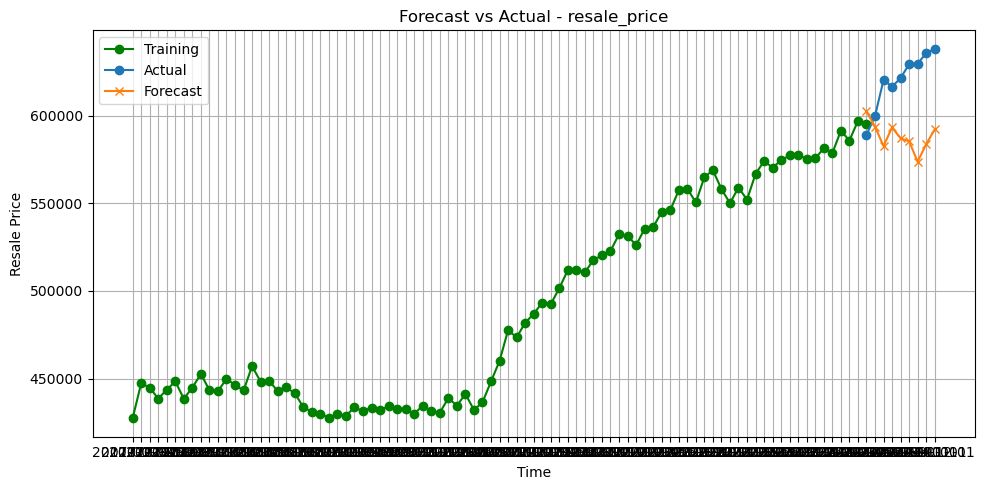

In [253]:
plt.figure(figsize=(10, 5))
plt.plot(df1.index, df1[target], label='Training', color = 'green', marker='o')
plt.plot(test1.index, y_true, label='Actual', marker='o')
plt.plot(forecast_df.index, y_pred, label='Forecast', marker='x')
plt.title(f"Forecast vs Actual - {target}")
plt.xlabel("Time")
plt.ylabel("Resale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## use xgboost to improve model performance

In [254]:
import xgboost as xgb

In [276]:
ignore = ['date', 'resale_price']
features = [col for col in df.columns if col not in ignore]

# Train model
model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5)
model.fit(df1[features], df1[target])

# Predict
y_pred = model.predict(test1[features])
y_true = test1[target]

In [277]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost MAE: 30548.01
XGBoost RMSE: 34659.51


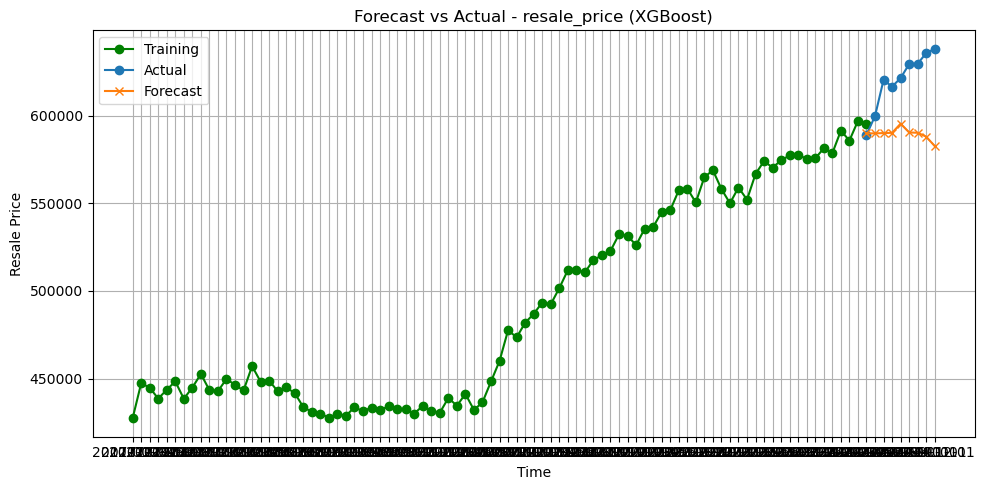

In [278]:
plt.figure(figsize=(10, 5))
plt.plot(df1.index, df1[target], label='Training', color = 'green', marker='o')
plt.plot(test1.index, y_true, label='Actual', marker='o')
plt.plot(test1.index, y_pred, label='Forecast', marker='x')
plt.title(f"Forecast vs Actual - {target} (XGBoost)")
#plt.xticks(min(df1.index), max(forecast_df.index), 30) # check for format of the date time intervals
plt.xlabel("Time")
plt.ylabel("Resale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()